## Change text to one-hot, get contexts of the word

In [12]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import np_utils

def corpus_preprocessing(corpus,window_size):
    # tokenize text
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    corpus_tokenized = tokenizer.texts_to_sequences(corpus)
    V = len(tokenizer.word_index)   
    for words in corpus_tokenized:
        L = len(words)
        # get the context of each word
        for index, word in enumerate(words):
            contexts = []
            labels = []
            s = index - window_size
            e = index + window_size + 1
            contexts.append([words[i]-1 for i in range(s, e) if 0 <= i < L and i != index])
            labels.append(word-1)
            x = np_utils.to_categorical(contexts, V)
            y = np_utils.to_categorical(labels, V)
            yield (x, y.ravel())
window_size = 2
corpus = ["I would like to do machine learning with my friends"]
for i, (x, y) in enumerate(corpus_preprocessing(corpus, window_size)):
    print(i, "\n center word =", y, "\n context words =\n",x)

0 
 center word = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
 context words =
 [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]]
1 
 center word = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 
 context words =
 [[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]]
2 
 center word = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
 context words =
 [[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]]
3 
 center word = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 
 context words =
 [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]]
4 
 center word = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
 context words =
 [[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]]
5 
 center word = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 
 context words =

## softmax 

In [13]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

## CBOW model

In [71]:
def cbow(context, label, W1, W2, loss):
    # forward
    x = np.mean(context, axis=0)
#     x = context[0]
    h = np.dot(W1[0].T, x[0]) + np.dot(W1[1].T, x[1])
    u = np.dot(W2.T, h)
    y_pred = softmax(u) # output
    
    # error backpropagation, update parameters
    e = -label + y_pred
    dW2 = np.outer(h, e)
    dW11 = np.outer(x[0], np.dot(W2, e))
    dW12 = np.outer(x[1], np.dot(W2, e))    
    new_W2 = W2 - eta * dW2
    new_W1 = np.random.rand(window_size, V, N)
    new_W1[0] = W1[0] - eta * dW11
    new_W1[1] = W1[1] - eta * dW12
    loss += -float(u[label == 1]) + np.log(np.sum(np.exp(u)))
    return new_W1, new_W2, loss


corpus = ["I would like to do machine learning with my friends"] 
N = 2 #size of hidden layer
window_size = 2 #size of context windows
eta = 0.1 #learning rate
np.random.seed(100)
V = 10 # length of phrase
# Initialization weight
W1 = np.random.rand(window_size, V, N)
W2 = np.random.rand(N, V)
losses = []
for j in range(1000):
    loss = 0.
    s = 0
    for i, (context, label) in enumerate(corpus_preprocessing(corpus, window_size)):
        W1, W2, loss = cbow(context, label, W1, W2, loss)
        s+=loss
    losses.append(s)
#         losses.append(loss)
#     print(loss)

## Result

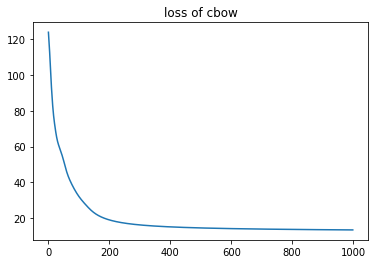

In [72]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("loss of cbow")
plt.plot(losses)
plt.show()